#Partie théorie 

#####La variance est utilisée dans le domaine de la statistique et de la probabilité en tant que mesure servant à caractériser la dispersion d’une distribution ou d’un échantillon. Il est possible de l’interpréter comme la dispersion des valeurs par rapport à la moyenne. Concrètement, la variance est définie comme la moyenne des carrés des écarts à la moyenne.


#####Visuellement, une distribution avec une grande variance sera plus étalée, alors qu’une distribution avec une petite variance sera très resserrée autour de sa moyenne.Il existe différent type de variance; 
#####Il y a la variance est soit positive, soit nulle. Quand elle est nulle, cela veut dire que la variable aléatoire correspond à une constante. Toutes les réalisations sont donc identiques.Variable quantitative. 
#####La variance ne se conçoit que lorsque la variable étudiée est quantitative et mesurée en tenant compte d’une échelle d’intervalles ou de rapports. Aussi, l’unité dans laquelle celle-ci est exprimée vaut le carré de l’unité utilisée pour les valeurs observées. Par exemple, considérant une série de poids exprimés en kilos, la variance correspondante doit s’interpréter en « kilos-carré ».

##### En Machine Learning, le terme variance est retrouvé dans la notion de dilemme biais-variance. En effet, l’erreur faite par un modèle d’apprentissage supervisé peut se décomposer en deux termes :

#####Le biais : cela correspond à la capacité d’un modèle à s’adapter aux données. Ce biais est souvent calculé comme l’erreur faite par le modèle sur le jeu de données d’apprentissage.
#####La variance : cela correspond à la robustesse d’un modèle. Cette variance est considérée comme l’écart de performance du modèle entre les données d’apprentissage et les données de test.
#####Si un modèle minimise le biais sans tenir compte de la variance, on parle d’overfitting ou de surapprentissage des données d’entraînement. A l’inverse, lorsqu’un modèle minimise la variance sans tenir compte du biais, on parle d’underfitting ou de sous-apprentissage des données d’entraînement.

#####On considère qu’un modèle minimise l’erreur quand il réalise le juste compromis entre biais et variance.

Source: https://kobia.fr/quest-ce-que-la-variance/

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




In [129]:
# les biblios de ML
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [130]:
donnee = sns.load_dataset('iris')
dataset = sns.load_dataset('iris')

In [131]:
donnee

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


#Que signifie les colonnes avec une seule valeu?
 ######A ma connaissance, une colonne avec une seule valeur et une colonne ou la plupart de ses contenus sont des données manquantes
##### ou il y a une seule ligne qui contient une donnee (une valeur compréhensible qui se présente






In [132]:
#regardons le contenue de chaque colonne séparément pour voir si nous avons une colonne
#dans le jeu de données iris qui a une seule valeur, colonne 0 est la colonne d'indice
donnee.iloc[:,1]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [133]:
#regardons la deuxieme colonne
donnee.iloc[:,2]

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal_length, Length: 150, dtype: float64

In [134]:
donnee.iloc[:,3]

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal_width, Length: 150, dtype: float64

In [135]:
donnee.iloc[:,4]

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

#####Pour cette question, je parcours tout le dataset , je ne vois pas une seule de nos quatres colonne qui contient une seule valeur

In [136]:
print(donnee.loc[1,["petal_width"]])

petal_width    0.2
Name: 1, dtype: object


Avec tres peu de valeurs

In [137]:
print(donnee.head(25).loc[:,["petal_length", "petal_width"]])

    petal_length  petal_width
0            1.4          0.2
1            1.4          0.2
2            1.3          0.2
3            1.5          0.2
4            1.4          0.2
5            1.7          0.4
6            1.4          0.3
7            1.5          0.2
8            1.4          0.2
9            1.5          0.1
10           1.5          0.2
11           1.6          0.2
12           1.4          0.1
13           1.1          0.1
14           1.2          0.2
15           1.5          0.4
16           1.3          0.4
17           1.4          0.3
18           1.7          0.3
19           1.5          0.3
20           1.7          0.2
21           1.5          0.4
22           1.0          0.2
23           1.7          0.5
24           1.9          0.2


In [138]:
# les données dupliquées d'abord
donnee[donnee.duplicated(keep=False)]

,sepal_length,sepal_width,petal_length,petal_width,species
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


On peut constater que toutes nos colonnes ont des données dupliquée, donc effacer les colonnes avec les données dupliquées revient à éffacer toute la base. Sauf la colonne index. pour éviter d'éffacer toute la base, j'éfface uniquement les données qui sont dupliquée

In [139]:
# voici la fonction del deja implemente en python qui peut-etre tresqui doit nous aider à faire cette supression de colonne avec des valeur dupliquées
dup = donnee.duplicated(keep=False)
del dup
donnee


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


#####Dans ces quatre ligne de code qui suivent je vais chercher la plus petite valeur de chaque colonne de nos données sauf la colonne index et la colonne species

In [140]:
print(min(donnee['sepal_length']))

4.3


In [141]:
print(min(donnee['sepal_width']))

2.0


In [142]:
print(min(donnee['petal_length']))

1.0


In [143]:
print(min(donnee['petal_width']))

0.1


In [144]:
# On conclut que petal_width est la colonne qui contient la plus petite valeur
#Ajoutons la plus petite valeur trouvee dans une variable
petite_val = (min(donnee['petal_width']))
petite_val

0.1

In [145]:
#regardons les nom des colonnes de notre jeu de données
col = donnee.columns
col

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

#### Les colonnes avec une seule valeur ou avec peu de valeurs sont problématiques car elle n'offrent pas la possibilité d'exploitation de connaissance comme les autres qui sont remplies de données car il y a des données manquantes ce qui va nuire a n'importe quelle opération qu'on pourrait vouloir effecuer sur l'ensemble de données.

# Ecriture des fonctions demandées dans l'énoncé de l'excerce

### Identification des colonnes avec une seule valeur

In [146]:
dataset.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [147]:
# Fonction pour retrouver une colonne avec une seule valeur
def one_value(datas):
    result = []
    columns = datas.columns
    for column in columns:
        if datas[column].isna().sum() == datas.shape[0]-1: # La colonne contient une seule valeur
            result.append(column)
    return np.array(result)

In [148]:
print(one_value(dataset))

[]


### Identification des colonnes ayant n valeurs seulement

Param: **n** : Nombre de valeur max pour qu'une colonne se qualifie

In [149]:
def n_value_columns(datas, n):
    result = []
    columns = datas.columns
    for column in columns:
        if datas[column].isna().sum() >= datas.shape[0]-n: # La colonne contient n valeurs max
            result.append(column)
    return np.array(result)

In [150]:
print(n_value_columns(donnee, 2))

[]


### Identification des colonnes qui contiennent des données dupliquées

2 lignes sont dupliquées lorsqu'elles contiennent des données identiques pour chaque colonnes

In [151]:
def duplicate_data_columns(datas):
    result = []
    columns = datas.columns
    for column_v in columns:
        same = []
        for column in columns:
            if column_v != column: # Si on a 2 colonnes différentes
                if datas[datas[column_v] == datas[column]].shape[0] == datas.shape[0]: # Si les 2 colonnes ont des données dupliquées
                    same.append(column)
        if len(same) != 0: #S'il ya une colonne identique
            for s in same:
                result.append([column_v, s])
    return np.array(result)

In [152]:
duplicate_data_columns(dataset)

array([], dtype=float64)

##Suppression des colonnes avec une seule valeur

In [153]:
def del_one_value(datas):
    result = datas.copy()
    columns = datas.columns
    for column in columns:
        if datas[column].isna().sum() == datas.shape[0]-1: # La colonne contient une seule valeur
            del(result[column])
    return result

In [154]:
dataset = del_one_value(dataset)

##Supression des colonnes avec n valeurs

In [155]:
def del_n_value_columns(datas, n):
    result = datas.copy()
    columns = datas.columns
    for column in columns:
        if datas[column].isna().sum() >= datas.shape[0]-n: # La colonne contient n valeurs max
            del(result[column])
    return result

In [156]:
dataset = del_n_value_columns(dataset, 2)

##Suppression des colonnes avec des données dupliquées (en laissant une des colonnes repliquées)

In [157]:
def del_duplicate_data_columns(datas):
    columns = datas.columns
    column2 = datas.columns
    columns_true = datas.columns
    not_del = []
    for c1 in columns:
        for c2 in column2:
            if c1 != c2: # Si on a 2 colonnes différentes
                if datas[datas[c1] == datas[c2]].shape[0] == datas.shape[0]: # Si les 2 colonnes ont des données repliquées
                    if c2 not in not_del:
                        columns_true = np.delete(columns_true, list(columns_true).index(c2))
                    not_del.append(c1)
        column2 = columns_true
    
    return datas[columns_true]

In [158]:
# Ajoutons une colonne disons mieux dupliquons la colonne sepal_length pour pouvoir essayer notre fonction qui doit supprimer la duplication 'del_duplicate_data_columns'
dataset['sepal_length_2'] = dataset['sepal_length']
dataset   

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_2
0,5.1,3.5,1.4,0.2,setosa,5.1
1,4.9,3.0,1.4,0.2,setosa,4.9
2,4.7,3.2,1.3,0.2,setosa,4.7
3,4.6,3.1,1.5,0.2,setosa,4.6
4,5.0,3.6,1.4,0.2,setosa,5.0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,6.7
146,6.3,2.5,5.0,1.9,virginica,6.3
147,6.5,3.0,5.2,2.0,virginica,6.5
148,6.2,3.4,5.4,2.3,virginica,6.2


In [159]:
del_duplicate_data_columns(dataset)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Faisons juste une comparaison entr la colonne petal_length et la colonne petal_width, on va utiliser reg comme valeur du parametre kind pour nous tracer une ligne et on   verra laquelle de ces deux contient plus de valeur et la ligne va passer au milieur de ces valeurs

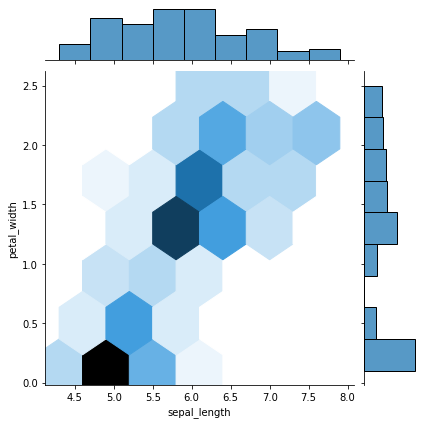

In [160]:
# faison plusieurs plot avec la fonction joinplot, jointplot vient toujour avec une distribution scatter
# mais on va utiliser le parametre kind et lui passer hex pour qu'il nous donne une distribution hexagone
# on peut aussi donner au parametre kind la valeur "reg" pour avoir la regression lineair representee par une ligne
# ou encore la valeur kde qui nous permet de voir la dimension 2 D kde, l'intensite de la zonne ou les points mactch le plus
sns.jointplot(x='sepal_length', y='petal_width',data=dataset, kind='hex')

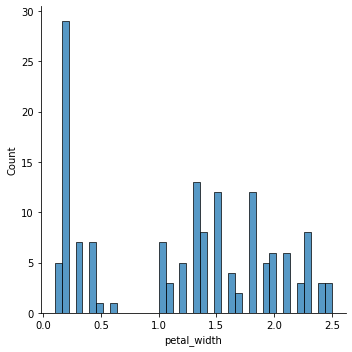

In [161]:
# Examinons de plus pres cette colonne petal_width au travers un displot en evitant kde de tracer sa courbe de distribution, kde=False
sns.displot(dataset['petal_width'], kde=False, bins=40)

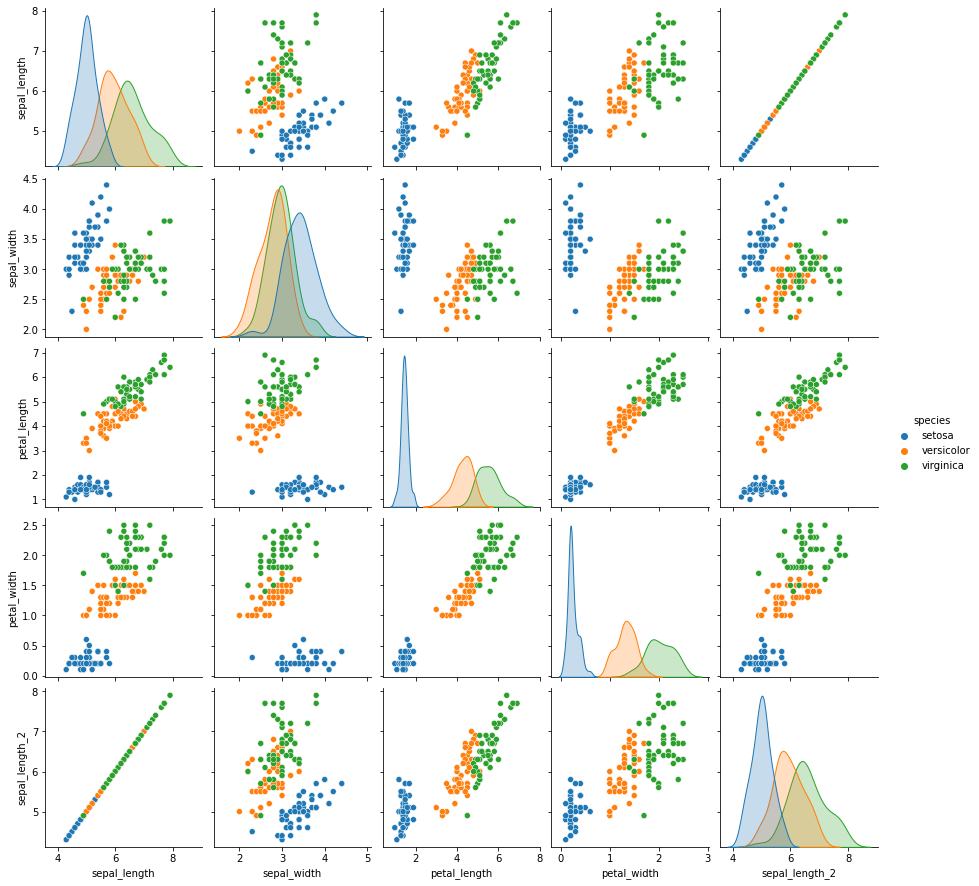

In [162]:
# on utilise pairplot pour afficher toutes nos donnees
#Ici on donne au parametre hue le nom de la colonne de notre cyble c'est a dire on veut identifier chaque cadrant les setosas, les versicolors et les virginicas.
#les legendres nous donnent plus explication, on peut aussi jouer avec la couleur de nos plots avec le parametre palette 
#sns.pairplot(donnee, hue='species', palette='coolwarm')
# mais je prefere la couleur par defaut
sns.pairplot(dataset, hue='species')

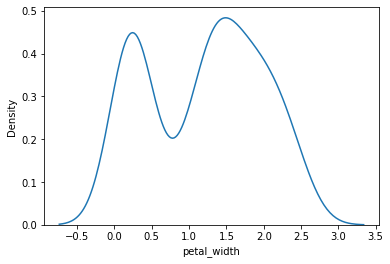

In [163]:
#Faisons juste un kde plot pour voir la distribution de 
sns.kdeplot(dat['petal_width'])

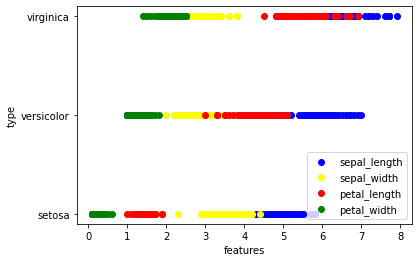

In [164]:
#Ici je vais essayer de tracer chaque caracteristique en fonction du type, 
#pour cela j'utilise  la bibliothèque matplotlib
plt.xlabel("features")
plt.ylabel("type")

pltX=dataset.loc[:, 'species']
pltY=dataset.loc[:, 'sepal_length']
plt.scatter(pltY, pltX, color='blue', label='sepal_length')


pltX=dataset.loc[:, 'species']
pltY=dataset.loc[:, 'sepal_width']
plt.scatter(pltY, pltX, color='yellow', label='sepal_width')


pltX=dataset.loc[:, 'species']
pltY=dataset.loc[:, 'petal_length']
plt.scatter(pltY, pltX, color='red', label='petal_length')


pltX=dataset.loc[:, 'species']
pltY=dataset.loc[:, 'petal_width']
plt.scatter(pltY, pltX, color='green', label='petal_width')

#ajoutons une legendre
plt.legend()
plt.show()

In [165]:
# faisons une separation des donnees d'entrainement des target qui sont a predire
x=dat.iloc[:,:-1]
y=dat.iloc[:,-1]
print(x.head())
print(y.head())

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object


In [166]:
#division des donnees en donnees de teste et doonnee d'entrainement de facon a creer mon modele
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)

(120, 4)
(30, 4)


In [167]:
# creation de notre modele
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [168]:
# essayons de tester le modek=le
prediction=model.predict(x_test)
print(prediction)
print(y_test)

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'setosa' 'setosa']
73     versicolor
18         setosa
118     virginica
78     versicolor
76     versicolor
31         setosa
64     versicolor
141     virginica
68     versicolor
82     versicolor
110     virginica
12         setosa
36         setosa
9          setosa
19         setosa
56     versicolor
104     virginica
69     versicolor
55     versicolor
132     virginica
29         setosa
127     virginica
26         setosa
128     virginica
131     virginica
145     virginica
108     virginica
143     virginica
45         setosa
30         setosa
Name: species, dtype: object


In [169]:
# si on regarde a l'oeil nu on peut voir la precision de notre modele,
# maintenant faison une evaluation du modele, pour dire a quel point notre modele est precis
print(classification_report(y_test, prediction))
print(accuracy_score(y_test,prediction))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

1.0


In [170]:
confusion_matrix(y_test,prediction)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])